In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split

In [3]:
import keras
from keras import Sequential
from keras import applications
from keras.layers import Dense
from keras.preprocessing import image
import tensorflow as tf

In [4]:
df = pd.read_csv('C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/Modern Database Management System/research paper/Code Implementation/Dental.csv',usecols=[0,1])
df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [5]:
df.isna().sum()

Image    0
Class    0
dtype: int64

In [6]:
df['Class'].value_counts()

0    63
1    37
Name: Class, dtype: int64

C:\Users\Trupt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

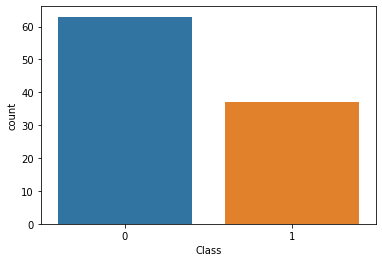

In [7]:
sns.countplot(df['Class'])

In [8]:
path_list = []
base_path = 'C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/Modern Database Management System/research paper/Code Implementation/Dental'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [9]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
df['pathes'] = df['Image'].map(pathes_dict.get)

In [10]:
df.head()

,Image,Class,pathes
0,Image1,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...
1,Image2,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...
2,Image3,1,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...
3,Image4,1,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...
4,Image5,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...


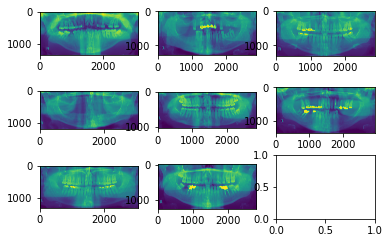

In [11]:
for x in range (0 ,9):
    img = imread(df['pathes'][x])
    plt.imshow(img)
    plt.subplot(3,3,x+1)

In [12]:
from PIL.Image import open
df['pixels']=df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [13]:
df.head()

,Image,Class,pathes,pixels
0,Image1,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...,"[[204, 189, 192, 211, 235, 248, 244, 233, 219,..."
1,Image2,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...,"[[213, 215, 210, 213, 216, 225, 233, 234, 221,..."
2,Image3,1,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...,"[[227, 227, 226, 226, 221, 217, 214, 218, 225,..."
3,Image4,1,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...,"[[186, 190, 204, 196, 192, 186, 178, 177, 179,..."
4,Image5,0,C:/Users/Trupt/OneDrive/Desktop/M.Tech/2 Sem/M...,"[[144, 179, 216, 197, 216, 235, 227, 199, 192,..."


In [14]:
from keras.applications import mobilenet_v2
image_list = []
for i in range(0,len(df)):
    dental_xray = df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(dental_xray)
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))
X = np.array(image_list)
print(X.shape)

(100, 224, 224, 1)


In [15]:
y = np.array(df.Class)

In [16]:
y

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)
print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (80, 224, 224, 1)
The size of the X_train : 80
The shape of the X_test : (20, 224, 224, 1)
The size of the X_test: 20


In [18]:
from keras.applications.mobilenet_v2 import MobileNetV2
num_classes = 2
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 preds (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


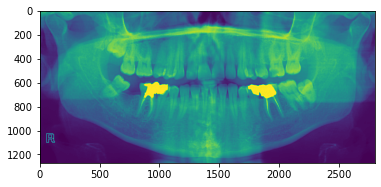

In [19]:
img = imread(df['pathes'][x])
plt.imshow(img)

In [20]:
import cv2
image_list = []
for i in range(0,len(df)):
    dental_xray = cv2.imread(df['pathes'][x])
    dental_xray=cv2.resize(dental_xray,(224,224))
    image_list.append(dental_xray)

In [21]:
X = np.array(image_list)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)

In [23]:
from keras.applications.mobilenet_v2 import MobileNetV2
num_classes = 1
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
model.summary()
import tensorflow
model.compile( 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tensorflow.keras.optimizers.SGD(lr=0.001),
    metrics=['accuracy']
)
model.fit(
    X_train,
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test)
)
model.save("model_dental.h5")
print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 preds (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


C:\Users\Trupt\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10


C:\Users\Trupt\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 7s 2s/step - loss: 0.6470 - accuracy: 0.6625 - val_loss: 0.7192 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 3s 973ms/step - loss: 0.6436 - accuracy: 0.6625 - val_loss: 0.7454 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.6419 - accuracy: 0.6625 - val_loss: 0.7350 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 963ms/step - loss: 0.6411 - accuracy: 0.6625 - val_loss: 0.7541 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 3s 964ms/step - loss: 0.6454 - accuracy: 0.6625 - val_loss: 0.7504 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 3s 991ms/step - loss: 0.6413 - accuracy: 0.6625 - val_loss: 0.7505 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.6399 - accuracy: 0.6625 - val_loss: 0.7516 - val_accuracy: 0.5000
Epoch 8/10
3/3 [========================

C:\Users\Trupt\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [24]:
pretrained_cnn = keras.models.load_model('C:/Users/Trupt/model_dental.h5')
eval_score = pretrained_cnn.evaluate(X_test,y_test)
print('Eval loss:',eval_score[0])
print('Eval accuracy:',eval_score[1] )

1/1 [==============================] - 1s 1s/step - loss: 0.7571 - accuracy: 0.5000
Eval loss: 0.7570593953132629
Eval accuracy: 0.5


In [25]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Dental Disease','Dental Disease']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

C:\Users\Trupt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trupt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trupt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'No Dental Disease': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 10},
 'Dental Disease': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 10},
 'accuracy': 0.5,
 'macro avg': {'precision': 0.25,
  'recall': 0.5,
  'f1-score': 0.3333333333333333,
  'support': 20},
 'weighted avg': {'precision': 0.25,
  'recall': 0.5,
  'f1-score': 0.3333333333333333,
  'support': 20}}